In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/train.csv
./input/test.csv
./input/sample_submission.csv
./input/test/test/bb4470ca691cd15f51a464645b4234c3.jpg
./input/test/test/d148dc8bb0d3311bff9f7237ff9a8188.jpg
./input/test/test/406cacfb22eaa42f6eda4bf27aa5b081.jpg
./input/test/test/a85b61c5f6a321fe1da028b18586fc4b.jpg
./input/test/test/38b649997c117ffa68e7319ea9f111e6.jpg
./input/test/test/296ec4776e89a65ce8e262ed545ed4bb.jpg
./input/test/test/821787908e9c5f2f757fa7c3351a6785.jpg
./input/test/test/2331c9221825472c0a643dcc3a1f5249.jpg
./input/test/test/291bfda376c0ac532fb791d22ae1bb80.jpg
./input/test/test/b0b5f5950d2fda0eed8304ea18eef430.jpg
./input/test/test/42b49544799141c6f402c6f7d1fd0cce.jpg
./input/test/test/7a0d4f1dd17a52bf9cb542af4c9142af.jpg
./input/test/test/608183886586661fbb2a422d4740c2e2.jpg
./input/test/test/56c7427df79c37d0602a2797539ca761.jpg
./input/test/test/e4b2d2e8706fc69f39d8d2bafeff9cf9.jpg
./input/test/test/4f1076e6080882564075e0c677ce4f1b.jpg
./input/test/test/e19700bdfef1034b79b79f1146d38bca.jpg


# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project. 

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [57]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [59]:
# 2. Load Data
train_df = pd.read_csv('./input/bttai-ajl-2025/train.csv').drop('ddi_scale', axis=1)
test_df = pd.read_csv('./input/bttai-ajl-2025/test.csv').drop('ddi_scale', axis=1)

In [60]:
train_df

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,benign-epidermal,benign,NaN
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,benign-epidermal,benign,NaN
...,...,...,...,...,...,...,...
2855,aa4f94e33bbc118e2a95f7a8ad0344a1,2,2,folliculitis,inflammatory,non-neoplastic,NaN
2856,fb1feb5dbf0038eee9348a3740cef6f9,1,1,superficial-spreading-melanoma-ssm,malignant-melanoma,malignant,NaN
2857,811f74634ec6dd7022aa04e4968fea38,1,1,acne,inflammatory,non-neoplastic,NaN
2858,9983c4ae2e5b505b746da35d068d00ec,3,4,eczema,inflammatory,non-neoplastic,NaN


In [61]:


# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'
test_df['md5hash'] = test_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the correct path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

In [62]:
# Check the first few rows to understand the structure
train_df.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,file_path
0,fd06d13de341cc75ad679916c5d7e6a6.jpg,4,4,prurigo-nodularis,benign-epidermal,benign,NaN,prurigo-nodularis/fd06d13de341cc75ad679916c5d7...
1,a4bb4e5206c4e89a303f470576fc5253.jpg,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN,basal-cell-carcinoma-morpheiform/a4bb4e5206c4e...
2,c94ce27e389f96bda998e7c3fa5c4a2e.jpg,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic,keloid/c94ce27e389f96bda998e7c3fa5c4a2e.jpg
3,ebcf2b50dd943c700d4e2b586fcd4425.jpg,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN,basal-cell-carcinoma/ebcf2b50dd943c700d4e2b586...
4,c77d6c895f05fea73a8f3704307036c0.jpg,1,1,prurigo-nodularis,benign-epidermal,benign,NaN,prurigo-nodularis/c77d6c895f05fea73a8f37043070...


## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [63]:
# 3. Data Preprocessing
# Encode the labels
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])
print(type(train_df['encoded_label']))

<class 'pandas.core.series.Series'>


In [64]:
label_encoder.classes_

array(['acne', 'acne-vulgaris', 'actinic-keratosis',
       'basal-cell-carcinoma', 'basal-cell-carcinoma-morpheiform',
       'dermatofibroma', 'dermatomyositis', 'dyshidrotic-eczema',
       'eczema', 'epidermal-nevus', 'folliculitis', 'kaposi-sarcoma',
       'keloid', 'malignant-melanoma', 'melanoma', 'mycosis-fungoides',
       'prurigo-nodularis', 'pyogenic-granuloma', 'seborrheic-keratosis',
       'squamous-cell-carcinoma', 'superficial-spreading-melanoma-ssm'],
      dtype=object)

In [65]:
train_df.dtypes

md5hash                  object
fitzpatrick_scale         int64
fitzpatrick_centaur       int64
label                    object
nine_partition_label     object
three_partition_label    object
qc                       object
file_path                object
encoded_label             int64
dtype: object

In [66]:
train_df['nine_partition_label'].unique()

array(['benign-epidermal', 'malignant-epidermal', 'inflammatory',
       'malignant-cutaneous-lymphoma', 'malignant-melanoma',
       'benign-dermal', 'malignant-dermal'], dtype=object)

In [67]:
nine_partition_label_encoder = LabelEncoder()
train_df['encoded_nine_partition_label'] = nine_partition_label_encoder.fit_transform(train_df['nine_partition_label'])
three_partition_label_encoder = LabelEncoder()
train_df['encoded_three_partition_label'] = three_partition_label_encoder.fit_transform(train_df['three_partition_label'])

In [68]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = './input/bttai-ajl-2025/train/train/'

In [69]:
relational_columns = train_data.select_dtypes(include=[np.number])
corr_matrix = relational_columns.corr()

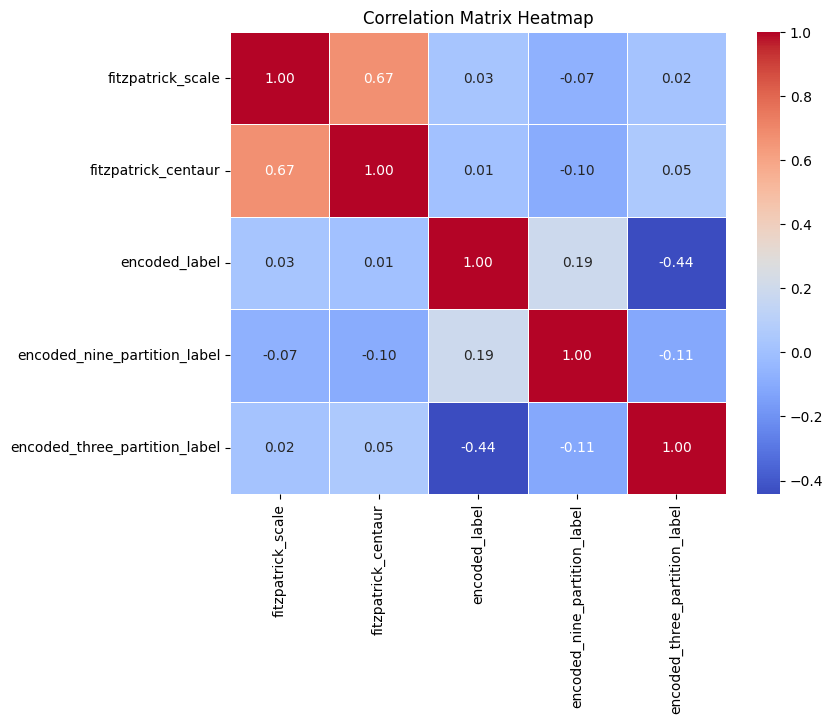

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [43]:
from PIL import Image
def get_image_sizes(directory):
    dimensions = []  # List to store image dimensions

    # Walk through the directory and its subdirectories
    for root, _, files in os.walk(directory):
        for file in files:  # Iterate over each file
            # Check if the file is a JPEG
            if file.lower().endswith('.jpg') or file.lower().endswith('.jpeg'):
                file_path = os.path.join(root, file)  # Get the full file path
                try:
                    with Image.open(file_path) as img:  # Open the image file
                        width, height = img.size  # Get the width and height of the image
                        channels = len(img.getbands())  # Get the number of color channels
                        dimensions.append((width, height, channels))  # Append dimensions to the list
                except Exception as e:
                    # Print an error message if the file cannot be processed
                    print(f"Could not process file {file_path}: {e}")

    return dimensions

In [45]:
dimensions = get_image_sizes(train_dir)

(array([ 978., 1638.,  124.,   46.,   28.,   17.,   20.,    3.,    4.,
           2.]),
 array([  85. ,  357.2,  629.4,  901.6, 1173.8, 1446. , 1718.2, 1990.4,
        2262.6, 2534.8, 2807. ]),
 <BarContainer object of 10 artists>)

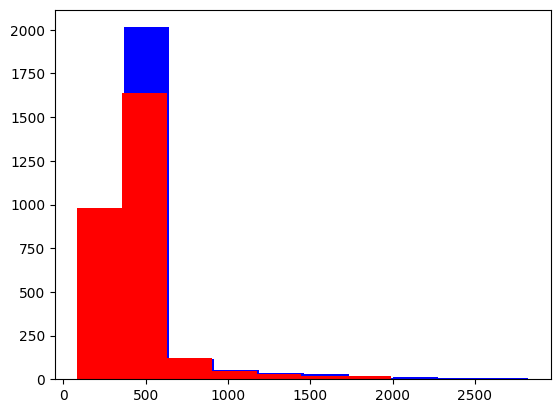

In [ ]:
plt.hist([x[0] for x in dimensions], color='blue', label='width')
plt.hist([x[1] for x in dimensions], color='red', label='height')


In [48]:
def create_generator(dataframe, directory, batch_size=32, target_size=(280, 280)):
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """
    # Fill in the correct flow_from_dataframe parameters
    generator = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col='file_path',  # Use combined path
        y_col='encoded_label',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw',
        validate_filenames=False  # Disable strict filename validation
    )
    return generator

In [49]:
# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)

Found 2288 non-validated image filenames.
Found 572 non-validated image filenames.


## 4. Build the model


In [ ]:
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.

## 5. Train the Model


In [ ]:
# TODO: Train your model here. 

## 6. Make Predictions on Test Data

In [ ]:
# 6. Make Predictions on Test Data
def preprocess_test_data(test_df, directory):
    """
    Template for loading and preprocessing test images.
    """
    # TODO: create a generator for the test set here.
    # test_datagen = ImageDataGenerator(rescale=1./255)
    # test_generator = test_datagen.flow_from_dataframe(
    #     .... ## set the test_generator here 
    # )
    # return test_generator


In [ ]:
# Load test data
test_dir = '/kaggle/input/bttai-ajl-2025/test/test/'
# test_generator = preprocess_test_data(test_df, test_dir)

## 7. Generate Predictions

In [ ]:
# TODO
# Generate predictions based on the trained model
# Then, save the predictions into a CSV file for submission